# Computer simulation practical assingment 1
## Hirbod Behnam 99171333

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
    الف) در ابتدا تابعی می‌نویسیم که بتواند دو عدد تصادفی تولید کند که مختصات
    x و y
    در صفحه بین -1 و 1 هستند. سپس در تابع دیگری تعدادی بار این تابع را صدا می‌زنیم و در آن فاصله‌ی نقطه‌ی حاصل تا
    (0, 0)
    را حساب می‌کنیم. در صورتی که فاصله کمتر مساوی 1 بود، نقطه درون دایره است.
    <br>
    در حین ساخت اعداد نیز لیستی نگه می‌داریم که در آن نسبت نقاط داخل دایره به بیرون آن است بعد ساخت هر نقطه‌ی جدید. این لیست در آینده برای کشیدن نمودار بخش بعدی به درد می‌خورد.
    <br>
    در نهایت نیز بحث می‌کنیم که الگوریتم ما چیست. مساحت یک مربع به ضلع دو برابر است با
    $2 \times 2 = 4$
    همچنین مساحت دایره به شعاع 1 برابر است با
    $1^2 \pi = \pi$.
    پس اگر به صورت تصادفی نقطه ایجاد کنیم در یک صفحه‌ی 2 در 2، به صورت میانگین
    $\frac{\pi}{4}$
    نسبت آنهایی است که فاصله‌ی آنها از وسط صفحه کمتر مساوی 1 است. پس برای تخمین عدد پی کافی است که نسبت به دست آمده را در چهار ضرب کنیم.
</div>

In [1]:
import random
import math

def random_point() -> tuple[float, float]:
    return (random.uniform(-1, 1), random.uniform(-1, 1))

def calculate_pi(max_iters: int, precision_digits: int) -> list[float]:
    result: list[float] = []
    inside_points = 0
    for total_points in range(max_iters):
        (x, y) = random_point()
        inside_circle = math.sqrt(x * x + y * y) <= 1
        if inside_circle:
            inside_points += 1
        result.append(4 * inside_points / (total_points + 1))
        # Check for precision
        if abs(result[-1] - math.pi) < 10**(-precision_digits):
            break
    return result

In [4]:
pi_steps = calculate_pi(10000, 4)
print("Calculated pi is", pi_steps[-1])
print("Steps needed to create pi is", len(pi_steps))

Calculated pi is 3.1416309012875536
Steps needed to create pi is 233


<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
    ب) از کتابخانه‌ی matplotlib استفاده می‌کنیم.
</div>

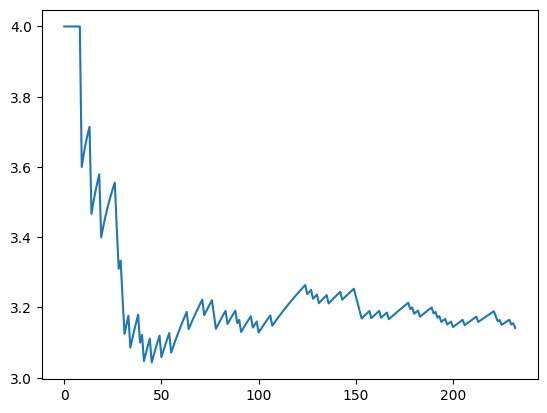

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(np.array(range(len(pi_steps))), np.array(pi_steps))
plt.show()

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
پ) به حداکثر تعداد عضو‌های آرایه‌ی pi_steps عدد درست می‌کنیم. مقدار دقت را نیز عدد بسار بزرگی می‌گذاریم تا مطمئن شویم که اول به محدودیت تعداد بار آزمایش بر می‌خوریم به جای تعداد رقم اعشار.
</div>

Calculated pi for the second time is 3.2618025751072963


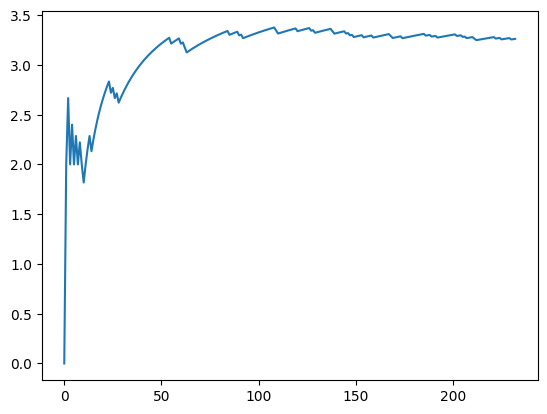

In [8]:
pi_steps2 = calculate_pi(len(pi_steps), 100)
print("Calculated pi for the second time is", pi_steps2[-1])

fig, ax = plt.subplots()
ax.plot(np.array(range(len(pi_steps2))), np.array(pi_steps2))
plt.show()

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
دلیل این تفاوت این است که ما صرفا بر پایه‌ی اعداد رندوم در حال حدس زدن عدد پی هستیم! اگر حتی بی‌نهایت بار این آزمایش را تکرار بکنیم، تضیمنی وجود ندارد که حتی بتوان 1 رقم بعد از اعشار عدد پی را درست تخمین زد (با اینکه احتمال آن
بسیار کم است.)
</div>

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
ت) خیر نمی‌توان از توزیع دیگه‌ای استفاده کرد. مشخص است که تنها توضیع قابل قبول توزیع یونیفرم است. در صورت استفاده از توزیع‌های دیگر ممکن بود که مثلا اکثر نقات در بیرون از دایره قرار بگیرند.
همچنین امکان تعیین کردن بازه‌ی اعداد خروجی وجود ندارد در اکثر توزیع‌های دیگر.
<br>
به عنوان مثال در زیر از توزیع نمایی استفاده کردیم که در صورتی که خروجی حاصل آن بزرگتر از 1 شد، آنرا با 1 مینیمم
می‌گیرد.
</div>

Calculated pi is 2.172


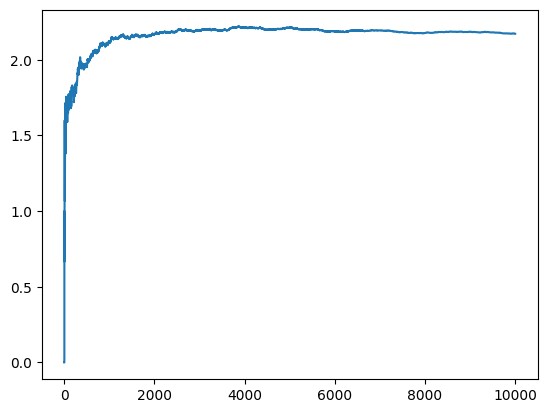

In [9]:
def random_point_exp() -> tuple[float, float]:
    return (min(random.expovariate(1) - 1, 1), min(random.expovariate(1) - 1, 1))

def calculate_pi_exp(max_iters: int) -> list[float]:
    result: list[float] = []
    inside_points = 0
    for total_points in range(max_iters):
        (x, y) = random_point_exp()
        inside_circle = math.sqrt(x * x + y * y) <= 1
        if inside_circle:
            inside_points += 1
        result.append(4 * inside_points / (total_points + 1))
    return result

pi_steps = calculate_pi_exp(10000)
print("Calculated pi is", pi_steps[-1])
fig, ax = plt.subplots()
ax.plot(np.array(range(len(pi_steps))), np.array(pi_steps))
plt.show()

<div dir="rtl" style="font-size:18px; font-family:B Yekan;">
    ث) مانند قسمت قبل در ابتدا مربعی را در نظر می‌گیریم که کل بیضی را شامل شود. به کمک desmos متوجه می‌شویم که
    یک مربع 8 در 8 می‌تواند مناسب باشد.
    <img src="desmos.jpg" style="display: block; margin-left: auto; margin-right: auto; width: 50%;"/>
    حال دو عدد تصادفی بین -4 تا 4 تولید می‌کنیم و چک می‌کنیم که آیا
    $5x^2-6xy+5y^2$
    کمتر مساوی 32 می‌شود یا خیر. در صورتی که کمتر مساوی شد، نشان می‌دهد که نقطه داخل بیضی است.
    در نهایت نسبت تعداد نقاط داخل به بیرون را در 64 ضرب می‌کنیم. که مساحت بیضی را تخمین بزنیم.
</div>

Calculated area is 25.1392


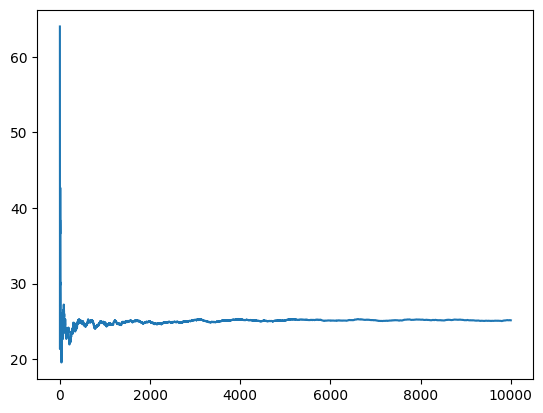

In [13]:
def random_point() -> tuple[float, float]:
    return (random.uniform(-4, 4), random.uniform(-4, 4))

def calculate_area(iters: int) -> list[float]:
    result: list[float] = []
    inside_points = 0
    for total_points in range(iters):
        (x, y) = random_point()
        inside_circle = 5 * x * x - 6 * x * y + 5 * y * y <= 32
        if inside_circle:
            inside_points += 1
        result.append(64 * inside_points / (total_points + 1))
    return result

area_steps = calculate_area(10000)
print("Calculated area is", area_steps[-1])
fig, ax = plt.subplots()
ax.plot(np.array(range(len(area_steps))), np.array(area_steps))
plt.show()